## Моделирование молекулярной динамики

   - Система: ГЦК решётка $7\times7\times7$ частиц;
   - Постоянная решётки: $a = 1.75~\sigma $;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Начальная температура: $T_i = 2.8~\varepsilon / k_B$;
   - Конечная температура: $T_f = 10^{-10}~\varepsilon / k_B$;
   - Скорость охлаждения: $v_T = 0.02~\varepsilon / k_B\tau$;
   - Термостат: масштабирование скоростей;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число шагов для охлаждения: 40000;
   - Функция радиального распределения, среднеквадратичное смещение и коэффициенты самодиффузии рассчитывалась через каждые 5000 шагов;
   - Подсчёт состоял из 2499 шагов: 500 на уравновешивание системы при фиксированной температуре и 1999 на усреднение по ансамблям (к первому ансамблю относятся шаги с 1 по 1000 шаг, ко второму - с 2 по 1001 и т.д.);
   - Функция радиального распределения вычислялась как среднее по времени за первые 1000 шагов;

#### Импорт необходимых библиотек

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = [i / 2.54 for i in (15, 15)]
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.labelsize'] = 14

#### Путь к файлам с данными

In [3]:
BASE_DIRECTORY = os.path.dirname(os.getcwd())
PATH_TO_ALL_DATA = os.path.join(BASE_DIRECTORY, 'data')
PATH_TO_ALL_PLOTS = os.path.join(BASE_DIRECTORY, 'plots')
CURRENT_DATA = '!2020-12-22'

PATH_TO_CURRENT_DATA = os.path.join(PATH_TO_ALL_DATA, CURRENT_DATA)
PATH_TO_CURRENT_PLOTS = os.path.join(PATH_TO_ALL_PLOTS, CURRENT_DATA)

try:
    os.mkdir(PATH_TO_CURRENT_PLOTS)
except FileExistsError:
    pass

In [4]:
rdf_filename = os.path.join(PATH_TO_CURRENT_DATA, 'rdf_T_')
transport_filename = os.path.join(PATH_TO_CURRENT_DATA, 'transport_T_')
parameters_filename = os.path.join(PATH_TO_CURRENT_DATA, 'system_parameters.csv')

In [5]:
plot_filename_postfix = 'cooling'

In [6]:
def save_plot(filename):
    plt.savefig(
        os.path.join(PATH_TO_CURRENT_PLOTS, filename)
    )

#### Температуры, для которых была подчитана функция радиального распределения

In [7]:
temperatures = (
    2.80391,
#     2.69923,
    2.29754,
    1.80409,
    1.29977,
    0.80038,
    0.30017,
    0.00000,
)

#### Извлечение значений функции радиального распределения из файлов

In [8]:
rdf_data = pd.DataFrame(columns=['radius'])
msd_data = pd.DataFrame(columns=['time'])
vel_autocor_data = pd.DataFrame(columns=['time'])
einstein_diffusion_data = pd.DataFrame(columns=['time'])
green_kubo_diffusion_data = pd.DataFrame(columns=['time'])

for temperature in temperatures:
    df = pd.read_csv(
        f'{rdf_filename}{temperature:.5f}.csv',
        sep=';',
    )
    rdf_data = rdf_data.merge(
        right=df,
        how='outer',
        on='radius',
    )
    df = pd.read_csv(
        f'{transport_filename}{temperature:.5f}.csv',
        sep=';',
    )
#     df['time'] = 0.005 * (1 + df.index.values)
    msd_data = msd_data.merge(
        right=df[['time', 'msd']],
        how='outer',
        on='time',
    )
    vel_autocor_data = vel_autocor_data.merge(
        right=df[['time', 'velocity_autocorrelation']],
        how='outer',
        on='time',
    )
    einstein_diffusion_data = einstein_diffusion_data.merge(
        right=df[['time', 'einstein_diffusion']],
        how='outer',
        on='time',
    )
    green_kubo_diffusion_data = green_kubo_diffusion_data.merge(
        right=df[['time', 'green_kubo_diffusion']],
        how='outer',
        on='time',
    )
    rdf_data = rdf_data.rename(columns={'rdf': f'{temperature:.5f}'})
    msd_data = msd_data.rename(columns={'msd': f'{temperature:.5f}'})
    vel_autocor_data = vel_autocor_data.rename(columns={'velocity_autocorrelation': f'{temperature:.5f}'})
    einstein_diffusion_data = einstein_diffusion_data.rename(columns={'einstein_diffusion': f'{temperature:.5f}'})
    green_kubo_diffusion_data = green_kubo_diffusion_data.rename(columns={'green_kubo_diffusion': f'{temperature:.5f}'})

msd_data

,time,2.80391,2.29754,1.80409,1.29977,0.80038,0.30017,0.00000
0,0.005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,0.010,0.000211,0.000173,0.000136,0.000098,0.000060,0.000023,4.937624e-13
2,0.015,0.000841,0.000689,0.000541,0.000390,0.000240,0.000090,1.837114e-12
3,0.020,0.001884,0.001545,0.001214,0.000875,0.000539,0.000202,3.968434e-12
4,0.025,0.003330,0.002731,0.002147,0.001549,0.000955,0.000358,6.984827e-12
...,...,...,...,...,...,...,...,...
995,4.980,6.935351,6.023333,4.817071,3.312318,2.096485,0.189114,4.469798e-07
996,4.985,6.942984,6.029814,4.822141,3.315604,2.098618,0.189242,4.479163e-07
997,4.990,6.950622,6.036296,4.827210,3.318888,2.100751,0.189370,4.488538e-07
998,4.995,6.958265,6.042780,4.832276,3.322172,2.102883,0.189499,4.497923e-07


#### Графики функций радиального распределения $g(\textbf{r})$ при различных температурах

$$g(\textbf{r})=\dfrac{V}{N^2}\left<\sum_{i}{\sum_{j\ne i}{\delta(\textbf{r}-\textbf{r}_{ij})}}\right>$$

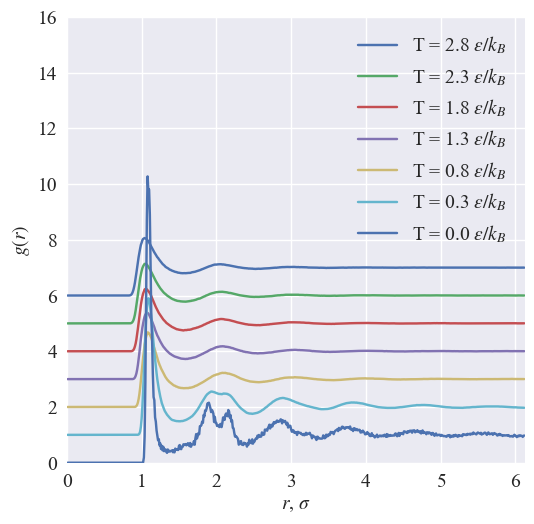

In [9]:

plt.rcParams['font.size'] = 14
for i, temperature in enumerate(temperatures):
    plt.plot(
        rdf_data['radius'],
        rdf_data[f'{temperature:.5f}'] + 1 * (len(temperatures) - (i + 1)), 
        label=f'T = {temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel('$r$, $\sigma$');
plt.ylabel('$g(r)$');
plt.xlim(
    left=0, 
    right=6.125,
);
plt.ylim(
    bottom=0, 
    top=16,
);
plt.legend();

save_plot(f'rdf_{plot_filename_postfix}.png')

#### Временная зависимость среднеквадратичного смещения $\left<\Delta r^2(t)\right>$ при различных температурах

$$\left<\Delta r^2(t)\right>=\dfrac{1}{N}\sum_{i=1}^{N}{\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2}$$

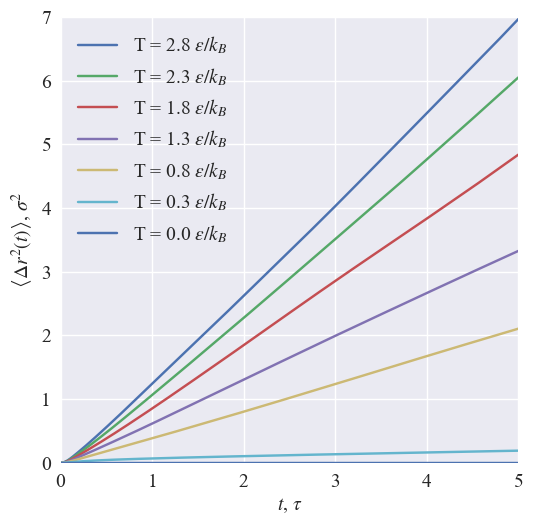

In [10]:
for i, temperature in enumerate(temperatures):
    plt.plot(
        msd_data['time'],
        msd_data[f'{temperature:.5f}'], 
        label=f'T = {temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel(r'$t$, $\tau $');
plt.ylabel(r'$\left<\Delta r^2(t)\right>$, $\sigma^2$');
plt.xlim(
    left=0, 
    right=5,
);
plt.ylim(
    bottom=0, 
    top=7,
);
plt.legend();

save_plot(f'msd_{plot_filename_postfix}.png')

#### Временная зависимость автокорреляционнной функции скорости $\Psi(t)$ при различных температурах

$$\Psi(t) = \dfrac{1}{N}\left<\sum_{j=1}^N{\vec{v}_j(t)\vec{v}_j(0)}\right>$$

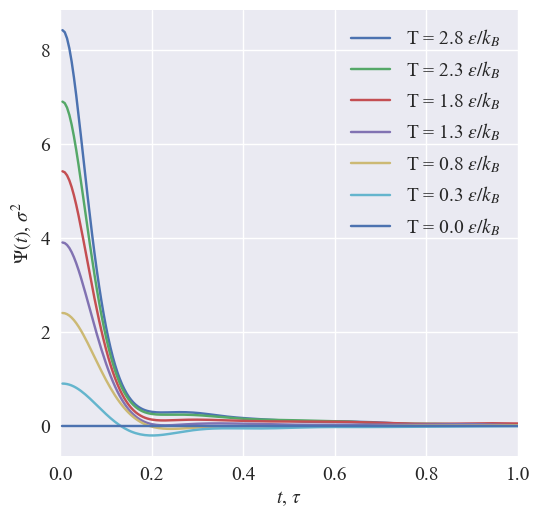

In [11]:
for i, temperature in enumerate(temperatures):
    plt.plot(
        vel_autocor_data['time'],
        vel_autocor_data[f'{temperature:.5f}'], 
        label=f'T = {temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel(r'$t$, $\tau $');
plt.ylabel(r'$\Psi(t)$, $\sigma^2$');
plt.xlim(
    left=0, 
    right=1,
);
plt.ylim(
#     bottom=0, 
#     top=20,
);
plt.legend();

save_plot(f'vel_autocorr_{plot_filename_postfix}.png')

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Эйнштейна, при различных температурах

$$D_E(t)=\dfrac{\left<\left<\Delta r^2\right>\right>}{6t}=\dfrac{1}{6tN}\left<\sum_{i=1}^{N}\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2\right>$$

$$D=\lim_{t\rightarrow\infty}{D_E(t)}$$

In [12]:
einstein_diffusion = np.zeros(len(temperatures), dtype=np.float)
green_kubo_diffusion = np.zeros(len(temperatures), dtype=np.float)

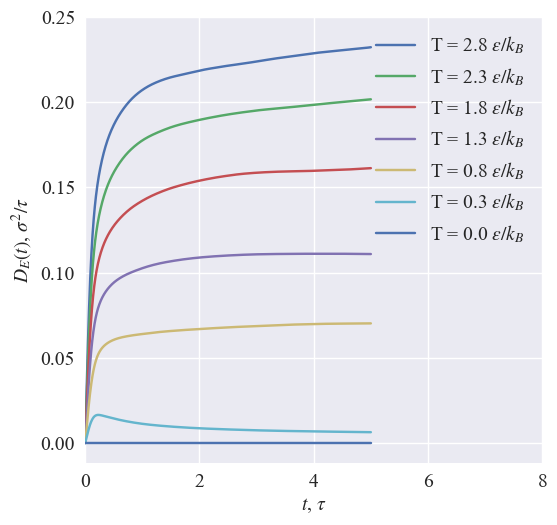

In [13]:
for i, temperature in enumerate(temperatures):
    diff_data = einstein_diffusion_data[f'{temperature:.5f}'].values
    plt.plot(
        einstein_diffusion_data['time'].values,
        diff_data, 
        label=f'T = {temperature:.1f} $\epsilon / k_B$',
    );
    einstein_diffusion[i] = diff_data[-1]
    
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'$D_E(t)$, $\sigma^2 / \tau$');
plt.xlim(
    left=0, 
    right=8,
);
plt.ylim(
#     bottom=0, 
    top=0.25,
);
plt.legend();

save_plot(f'diffusion_einstein_{plot_filename_postfix}.png')

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Грина-Кубо, при различных температурах

$$D_{GK}(t)=\dfrac{1}{3}\int_{0}^{t}{\Psi(\tau)d\tau}=\dfrac{1}{3N}\int_{0}^{t}{\left<\sum_{j=1}^N{\vec{v}_j(\tau)\vec{v}_j(0)}\right>d\tau}$$

$$D=\lim_{t\rightarrow\infty}{D_{GK}(t)}$$

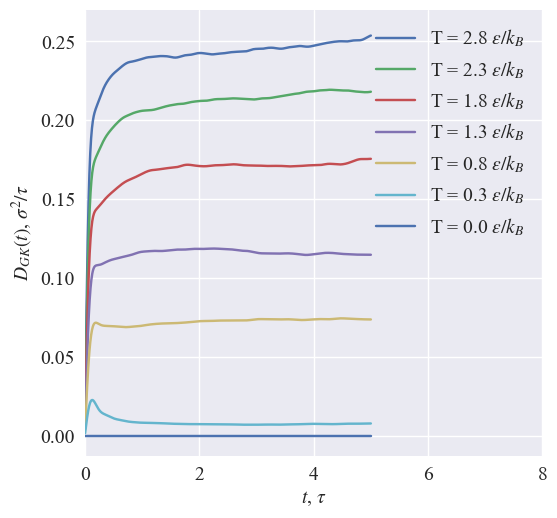

In [14]:
for i, temperature in enumerate(temperatures):
    diff_data = green_kubo_diffusion_data[f'{temperature:.5f}'].values
    plt.plot(
        green_kubo_diffusion_data['time'].values,
        diff_data, 
        label=f'T = {temperature:.1f} $\epsilon / k_B$',
    );
    green_kubo_diffusion[i] = diff_data[-1]
    
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'$D_{GK}(t)$, $\sigma^2 / \tau$');
plt.xlim(
    left=0, 
    right=8,
);
plt.ylim(
#     bottom=0, 
    top=0.27,
);
plt.legend();

save_plot(f'diffusion_green_kubo_{plot_filename_postfix}.png')

#### Сравнение коэффициентов самодиффузии, вычисленных через соотношения Эйнштейна и Грина-Кубо

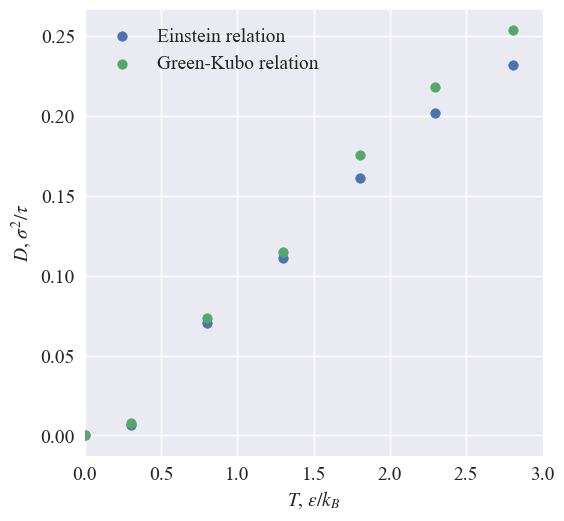

In [15]:
plt.scatter(
    np.array(temperatures),
    einstein_diffusion, 
    label='Einstein relation',
);
plt.scatter(
    np.array(temperatures),
    green_kubo_diffusion, 
    label='Green-Kubo relation',
); 
plt.xlabel(r'$T$, $\epsilon / k_B$');
plt.ylabel(r'$D$, $\sigma^2 / \tau$');
plt.xlim(
    left=0, 
    right=3,
);
plt.ylim(
#     bottom=0, 
#     top=0.1,
);
plt.legend(markerscale=1);


save_plot(f'diffusion_comparing_{plot_filename_postfix}.png')

#### Извлечение параметров системы из файла

In [16]:
system_parameters = pd.read_csv(parameters_filename, sep=';')

for column in system_parameters.columns:
    system_parameters[column] = system_parameters[column].round(5)

system_parameters

,temperature,pressure,system_kinetic_energy,potential_energy,total_energy,virial,msd,diffusion
0,2.80593,4.48055,5770.45671,-5108.69465,665.90874,13160.10056,0.00021,0.00704
1,2.80391,4.46452,5769.83492,-5116.36726,654.08944,13080.03180,0.00084,0.01403
2,2.80361,4.44821,5771.29232,-5125.41566,644.41926,12991.32537,0.00189,0.02096
3,2.80432,4.42920,5773.37327,-5137.49791,633.79440,12883.56751,0.00333,0.02777
4,2.80533,4.40866,5774.77366,-5151.12586,622.24741,12766.09452,0.00517,0.03446
...,...,...,...,...,...,...,...,...
39995,0.00011,-0.50776,0.00004,-9443.25145,-9443.03516,-2800.64524,110.68267,0.09224
39996,0.00000,-0.50784,0.20640,-9443.24892,-9443.24888,-2800.61023,110.68267,0.09224
39997,0.00010,-0.50769,0.00004,-9443.23260,-9443.02620,-2800.23874,110.68266,0.09224
39998,0.00000,-0.50777,0.21620,-9443.23314,-9443.23309,-2800.22143,110.68266,0.09224


In [17]:
times = (system_parameters.index + 1) * 0.005

#### Зависимость температуры системы от времени

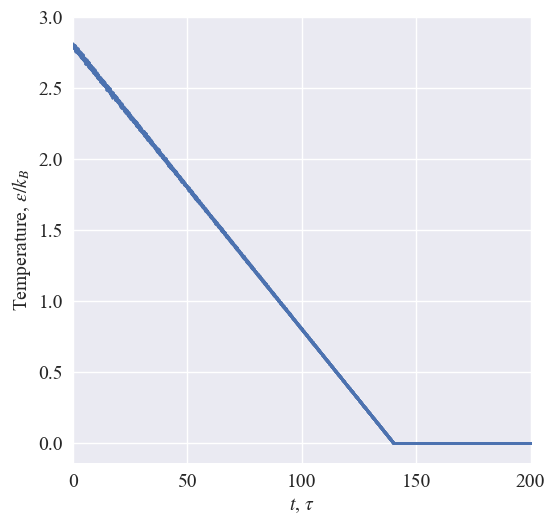

In [18]:
plt.scatter(
    times,
    system_parameters['temperature'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Temperature, $\epsilon / k_B$');

plt.xlim(
    left=0,
    right=200,
);
plt.ylim(
#     bottom=2.75,
    top=3,
);

save_plot(f'temperature_{plot_filename_postfix}.png')

#### Зависимость давления системы от времени

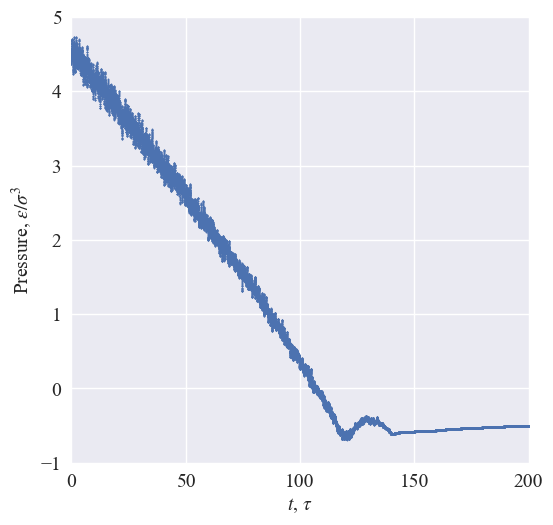

In [19]:
plt.scatter(
    times,
    system_parameters['pressure'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Pressure, $\epsilon / \sigma^3 $');

plt.xlim(
    left=0,
    right=200,
);
plt.ylim(
    bottom=-1,
    top=5,
);
save_plot(f'pressure_{plot_filename_postfix}.png')

#### Зависимость кинетической энергии системы от времени

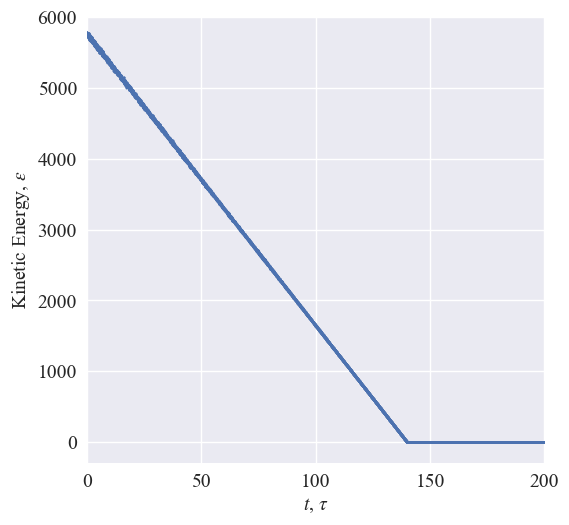

In [20]:
plt.scatter(
    times,
    system_parameters['system_kinetic_energy'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Kinetic Energy, $\epsilon$');

plt.xlim(
    left=0,
    right=200,
);
plt.ylim(
#     bottom=-1,
    top=6000,
);
save_plot(f'kinetic_energy_{plot_filename_postfix}.png')

#### Зависимость потенциальной энергии системы от времени

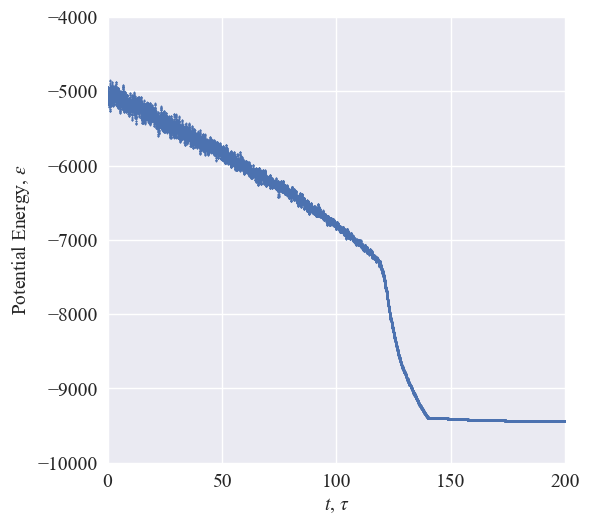

In [21]:
plt.scatter(
    times,
    system_parameters['potential_energy'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Potential Energy, $\epsilon$');

plt.xlim(
    left=0,
    right=200,
);
plt.ylim(
    bottom=-10000,
    top=-4000,
);
save_plot(f'potential_energy_{plot_filename_postfix}.png')

#### Зависимость полной энергии системы от времени

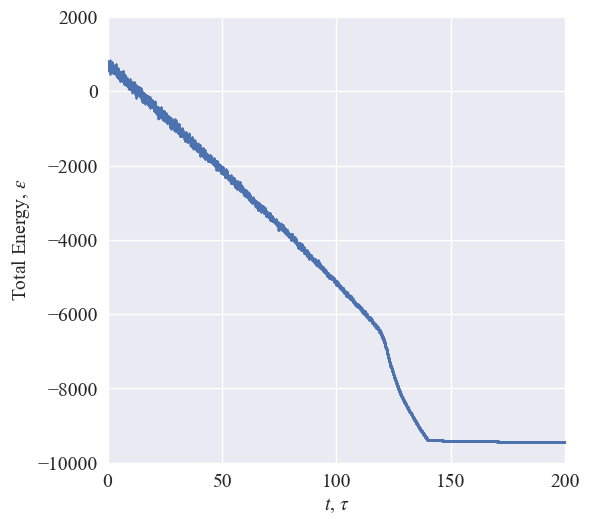

In [22]:
plt.scatter(
    times,
    system_parameters['total_energy'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Total Energy, $\epsilon$');

plt.xlim(
    left=0,
    right=200,
);
plt.ylim(
    bottom=-10000,
    top=2000,
);
save_plot(f'total_energy_{plot_filename_postfix}.png')

#### Энергии на одном графике

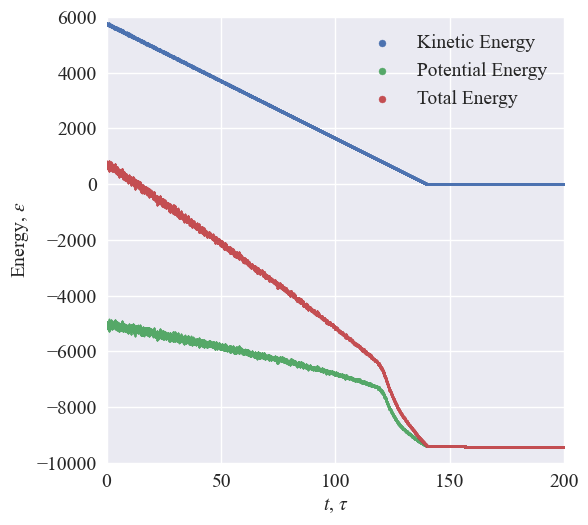

In [23]:
plt.scatter(
    times,
    system_parameters['system_kinetic_energy'],
    s=1,
    label='Kinetic Energy',
);
plt.scatter(
    times,
    system_parameters['potential_energy'],
    s=1,
    label='Potential Energy',
);
plt.scatter(
    times,
    system_parameters['total_energy'],
    s=1,
    label='Total Energy',
);

plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Energy, $\epsilon$');
plt.legend(markerscale=5);

plt.xlim(
    left=0,
    right=200,
);
plt.ylim(
    bottom=-10000,
    top=6000,
);
save_plot(f'all_energies_{plot_filename_postfix}.png')